## Simple Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [24]:
df = df[df['Gender']=='M']
df = df[['Father','Height']]
df.rename(columns={'Height':'Son'}, inplace=True)
df.head()

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [25]:
# inch to centi
df = df * 2.54
df.head()

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070


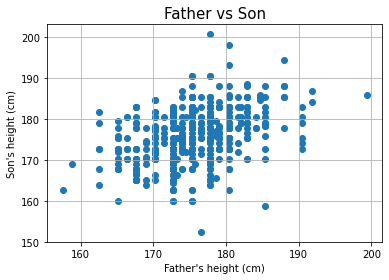

In [38]:
plt.scatter(df['Father'], df['Son'])
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son', fontsize=15)
plt.show()

#### 회귀선 구하고 그리기
- np.linalg.lstsq()
- np.polyfit()

In [33]:
weights, bias = np.polyfit(df['Father'], df['Son'], 1) # X, Y, Degree(차수)
weights, bias

(0.4477479176030236, 97.1776370073937)

In [34]:
# 회귀식을 2차식으로
np.polyfit(df['Father'], df['Son'], 2)
# 앞에 둘이 coef, 맨 뒤가 intercept

array([6.10561389e-04, 2.32817725e-01, 1.16071746e+02])

In [30]:
def sigmoid(x):
    """이 사이에 쓰는 말이 힌트로 보여집니다.
    x는 넘파이 어레이 타입이어야 합니다.
    """
    return 1. / (1 + np.exp(-x))

In [35]:
xs = np.array([156, 201])
ys = xs * weights + bias
ys

array([167.02631215, 187.17496845])

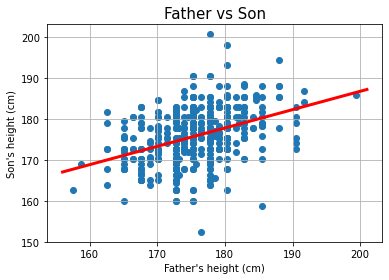

In [37]:
plt.scatter(df['Father'], df['Son'])
plt.plot(xs, ys, 'r-', lw=3)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son', fontsize=15)
plt.show()

<AxesSubplot:xlabel='Father', ylabel='Son'>

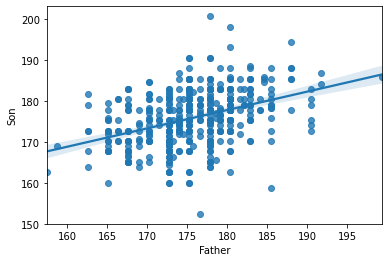

In [39]:
import seaborn as sns
sns.regplot(x='Father', y='Son', data=df)

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [47]:
# (465, ), (465, ) 를 fit 시키면 차원 문제로 에러 발생 (2차원으로 입력되야함)
# df['Father'] → df[['Father']] or df.Father.values.reshape(-1,1)
lr.fit(df[['Father']], df.Son)

LinearRegression()

In [48]:
df['Father'].shape

(465,)

In [49]:
df[['Father']].shape

(465, 1)

In [50]:
# Coefficent
lr.coef_

array([0.44774792])

In [51]:
# Intercept
lr.intercept_

97.17763700739346

In [52]:
# 잔차 제곱합 (RSS: Residual Sum of Square)
lr._residues

17556.59951549399

In [53]:
# 평가 - R squared
lr.score(df.Father.values.reshape(-1,1), df.Son.values)

0.15312927478306992

In [54]:
from sklearn.metrics import r2_score
pred = lr.predict(df.Father.values.reshape(-1,1))
r2_score(df.Son.values, pred)

0.15312927478306992